# Overview of the Adult Immune cell atlas

In here I will highlight the different compartments of the Developmental Immune cell atlas, for visualisation purposes only, as the DEG analyses are done in each specific compartment (HSC progenitors, Myeloid, Lymphoid and Erythro-Megakaryocytes). I will subset the dataset as in the compartment notebooks, therefore removing cell types reported as cycling, doublets or low quality.

In [1]:
import os,sys
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.sparse
import anndata
import seaborn as sns
#import scvelo as scv

#import milopy.core as milo
#import milopy.plot as milopl


In [63]:
sc.set_figure_params(dpi=100, dpi_save=300, transparent=False) # Makes it more visible

In [4]:
alpha_dir = "/home/irepan/Desktop/Github/Immune_Adaptation_Atlas_2023/results/adult_tissues/"
alpha_vals = pd.read_csv(alpha_dir + "abcmk_inference_alpha_top_500_orthologs.txt", sep="\t")

In [5]:
alpha_vals

cell     line  type    α_weak  α_strong  \
0                       T_CD4_CD8   Tcells  case  0.076085  0.259779   
1                      Trm_em_CD8   Tcells  case  0.104454  0.227545   
2                           Pre-B   Bcells  case  0.075390  0.180741   
3                    Trm_Th1_Th17   Tcells  case  0.189431  0.159361   
4                             DC1  Myeloid  case  0.040626  0.296073   
5                         GC_B_II   Bcells  case  0.101001  0.150050   
6             NK_CD56bright_CD16-   Tcells  case  0.185912  0.117828   
7                            MAIT   Tcells  case  0.114616  0.122997   
8             Classical_monocytes  Myeloid  case  0.135369  0.116112   
9                             DC2  Myeloid  case  0.036466  0.219808   
10                          migDC  Myeloid  case  0.059143  0.145870   
11                 Memory_B_cells   Bcells  case  0.080846  0.131949   
12         Nonclassical_monocytes  Myeloid  case  0.112163  0.126203   
13                          Pro-B   Bcells  case  0.059362  0.113050   
14                           ILC3   Tcells  case  0.107231  0.117504   
15                    Trm_gut_CD8   Tcells  case  0.104592  0.125804   
16                         GC_B_I   Bcells  case  0.043558  0.150323   
17        Tnaive_CM_CD4_activated   Tcells  case  0.112906  0.102522   
18                   Plasma_cells   Bcells  case  0.092156  0.088781   
19         Intestinal_macrophages  Myeloid  case  0.071383  0.144393   
20                        Trm_Tgd   Tcells  case  0.111699  0.091161   
21                          Tregs   Tcells  case  0.085081  0.096309   
22               Teffector_EM_CD4   Tcells  case  0.078813  0.097042   
23                            Tfh   Tcells  case  0.061891  0.096189   
24                   Plasmablasts   Bcells  case  0.038970  0.089807   
25       Intermediate_macrophages  Myeloid  case  0.037577  0.097558   
26                           ABCs   Bcells  case  0.077007  0.082812   
27                   Tem_emra_CD8   Tcells  case  0.070658  0.069773   
28                  Naive_B_cells   Bcells  case  0.061336  0.064092   
29                       NK_CD16+   Tcells  case  0.086152  0.054686   
30                     Tgd_CRTAM+   Tcells  case  0.057403  0.069694   
31           Alveolar_macrophages  Myeloid  case  0.028435  0.061531   
32  Erythrophagocytic_macrophages  Myeloid  case  0.038075  0.050730   
33                  Tnaive_CM_CD4   Tcells  case  0.044089  0.029520   
34                  Tnaive_CM_CD8   Tcells  case  0.004966  0.006818   

           α           γ₋         β        γ₊          γ₊₊         B    n  \
0   0.480838   537.382005  0.312226  9.118081  1563.953056  0.729241   28   
1   0.449948  1086.914532  0.310948  8.849573  1656.253210  0.629850   84   
2   0.410802   730.406161  0.268686  6.613066  1472.327334  0.399066  154   
3   0.409699  1093.108525  0.212957  2.160628   503.910434  0.428947  211   
4   0.360286   736.744521  0.243348  7.413497  1610.497971  0.336004  500   
5   0.353739   756.290440  0.254198  5.732977   776.909658  0.600436  349   
6   0.341419  1746.053438  0.226319  1.450086  1157.711078  0.878211  500   
7   0.334064   723.712131  0.185604  1.822467  1213.097962  0.479159  149   
8   0.306234  1161.474086  0.225760  1.986203   570.033585  0.436882  424   
9   0.305341   973.514392  0.235107  5.900347  1615.865580  0.350114  500   
10  0.302691   381.838938  0.226597  9.189886  1621.962120  0.333442  307   
11  0.302044   995.964542  0.209239  2.932653   770.864747  0.565966  236   
12  0.291102   874.768769  0.203173  7.010191   642.795445  0.429196  496   
13  0.281177  1244.813586  0.215951  2.204544   493.982742  0.367695   77   
14  0.277071  1184.628698  0.212404  1.738607   513.095447  0.773896  483   
15  0.275552  1053.847069  0.197670  2.569254  1378.058366  0.640700  374   
16  0.270804  1290.163357  0.257388  7.660667   465.458041  0.548062  500   
17  0.265002   919.524150  0.250327  2.963022   50

In [26]:
adata = sc.read_h5ad('/mnt/storage/Github/Immune_Adaptation_Atlas/adult_tissues/h5ad_files/global_RAW.h5ad')
adata

AnnData object with n_obs × n_vars = 329762 × 36601
    obs: 'Organ', 'Donor', 'Chemistry', 'Cell_category', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Majority_voting_CellTypist_high', 'Manually_curated_celltype', 'Sex', 'Age_range'
    uns: 'Age_range_colors', 'Sex_colors'
    obsm: 'X_umap'
    layers: 'counts'

In [27]:
adata.obs["celltype"] = adata.obs["Manually_curated_celltype"].str.replace(r"[/ &]","_").astype('category')
adata.obs["celltype"] = adata.obs["celltype"].str.replace(r"[()]","").astype('category')

/home/irepan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/home/irepan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


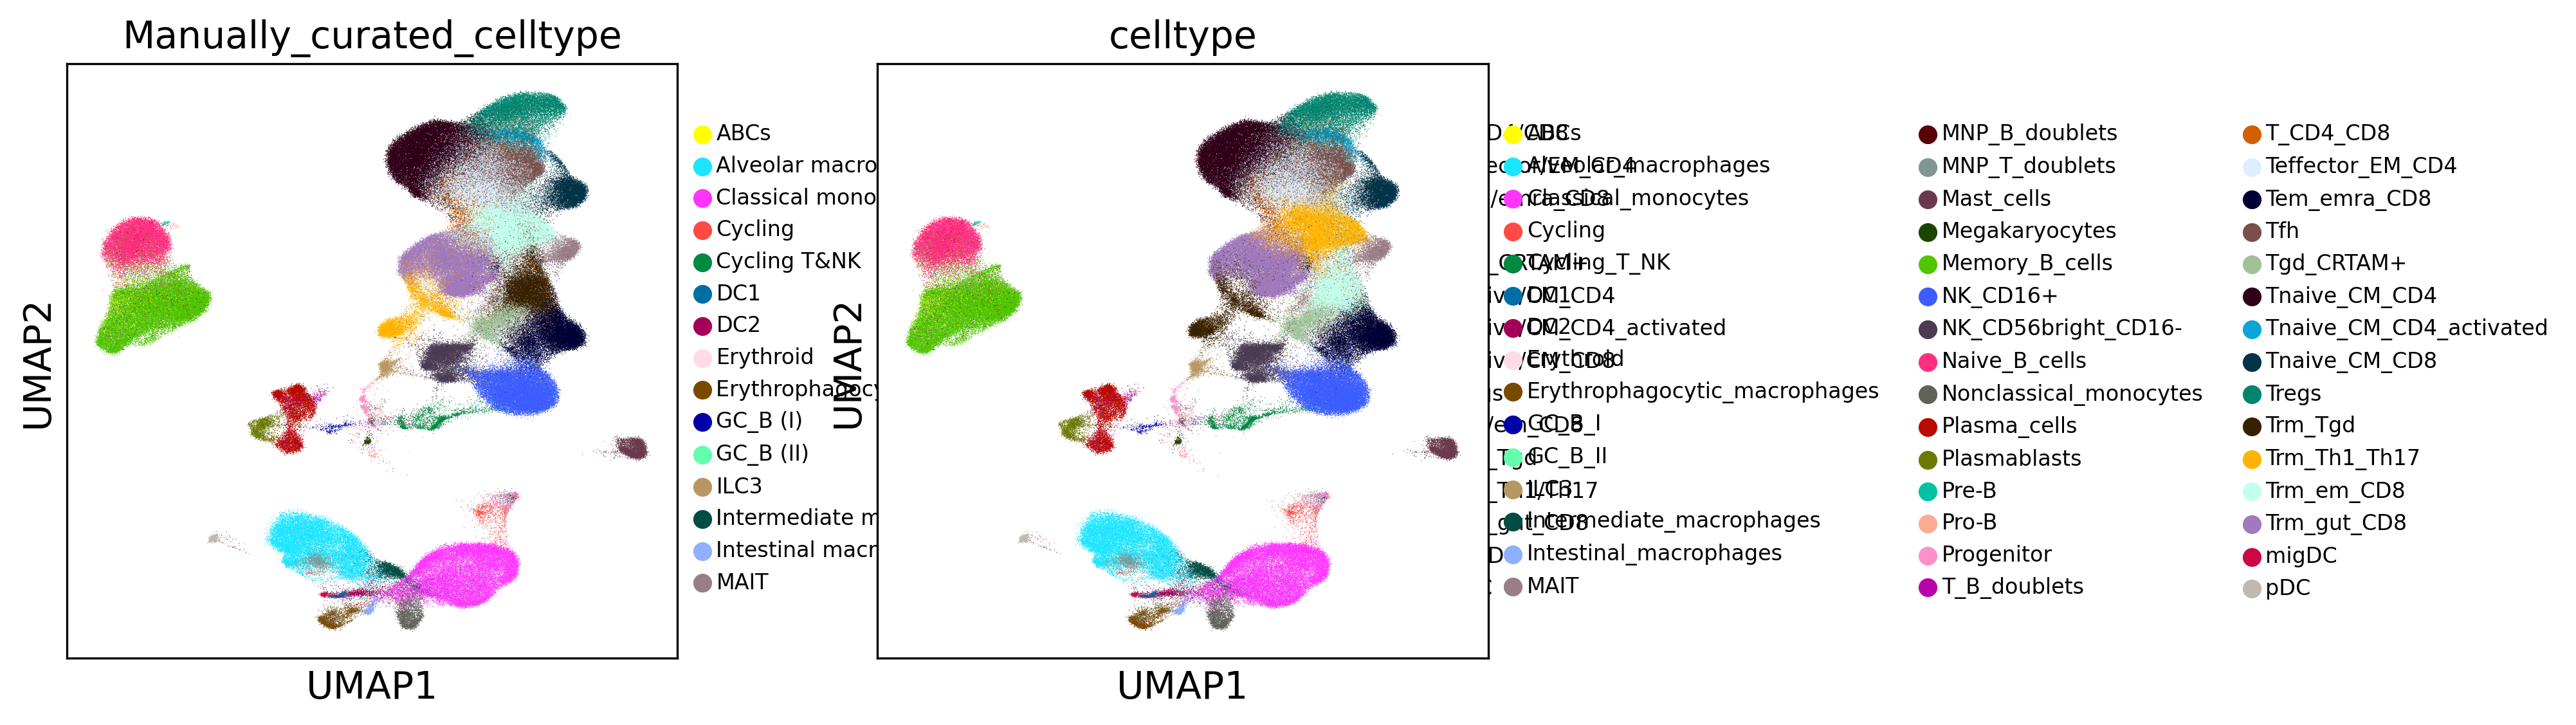

In [28]:
sc.pl.umap(adata, color=["Manually_curated_celltype","celltype"],#save= "Lymphoid.png",
           legend_fontoutline=1, legend_fontsize=8)

In [29]:
adata.obs["celltype"].cat.categories

Index(['ABCs', 'Alveolar_macrophages', 'Classical_monocytes', 'Cycling',
       'Cycling_T_NK', 'DC1', 'DC2', 'Erythroid',
       'Erythrophagocytic_macrophages', 'GC_B_I', 'GC_B_II', 'ILC3',
       'Intermediate_macrophages', 'Intestinal_macrophages', 'MAIT',
       'MNP_B_doublets', 'MNP_T_doublets', 'Mast_cells', 'Megakaryocytes',
       'Memory_B_cells', 'NK_CD16+', 'NK_CD56bright_CD16-', 'Naive_B_cells',
       'Nonclassical_monocytes', 'Plasma_cells', 'Plasmablasts', 'Pre-B',
       'Pro-B', 'Progenitor', 'T_B_doublets', 'T_CD4_CD8', 'Teffector_EM_CD4',
       'Tem_emra_CD8', 'Tfh', 'Tgd_CRTAM+', 'Tnaive_CM_CD4',
       'Tnaive_CM_CD4_activated', 'Tnaive_CM_CD8', 'Tregs', 'Trm_Tgd',
       'Trm_Th1_Th17', 'Trm_em_CD8', 'Trm_gut_CD8', 'migDC', 'pDC'],
      dtype='object')

In [30]:
adata_subset = adata[adata.obs['Manually_curated_celltype'].isin([
    ## Bcells
    'ABCs', 'GC_B (I)', 'GC_B (II)', 
    'Memory B cells', 'Naive B cells',
    'Plasma cells', 'Plasmablasts',
    'Pre-B', 'Pro-B',
    ## Tcells
    'ILC3', 'MAIT', 'NK_CD16+', 'NK_CD56bright_CD16-',
    'T_CD4/CD8', 'Teffector/EM_CD4', 'Tem/emra_CD8',
     'Tfh', 'Tgd_CRTAM+','Tnaive/CM_CD4', 
     'Tnaive/CM_CD4_activated', 'Tnaive/CM_CD8', 
     'Tregs','Trm/em_CD8', 'Trm_Tgd', 'Trm_Th1/Th17',
     'Trm_gut_CD8',
    ## Myeloid
    'Alveolar macrophages', 
    'Classical monocytes',# 'Cycling',
    'DC1', 'DC2',
    'Erythrophagocytic macrophages',
    'Intermediate macrophages',
    'Intestinal macrophages',# 'MNP/T doublets',
    'Nonclassical monocytes',
    'migDC'
])]

In [31]:
adata_subset

View of AnnData object with n_obs × n_vars = 315481 × 36601
    obs: 'Organ', 'Donor', 'Chemistry', 'Cell_category', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Majority_voting_CellTypist_high', 'Manually_curated_celltype', 'Sex', 'Age_range', 'celltype'
    uns: 'Age_range_colors', 'Sex_colors', 'Manually_curated_celltype_colors', 'celltype_colors'
    obsm: 'X_umap'
    layers: 'counts'

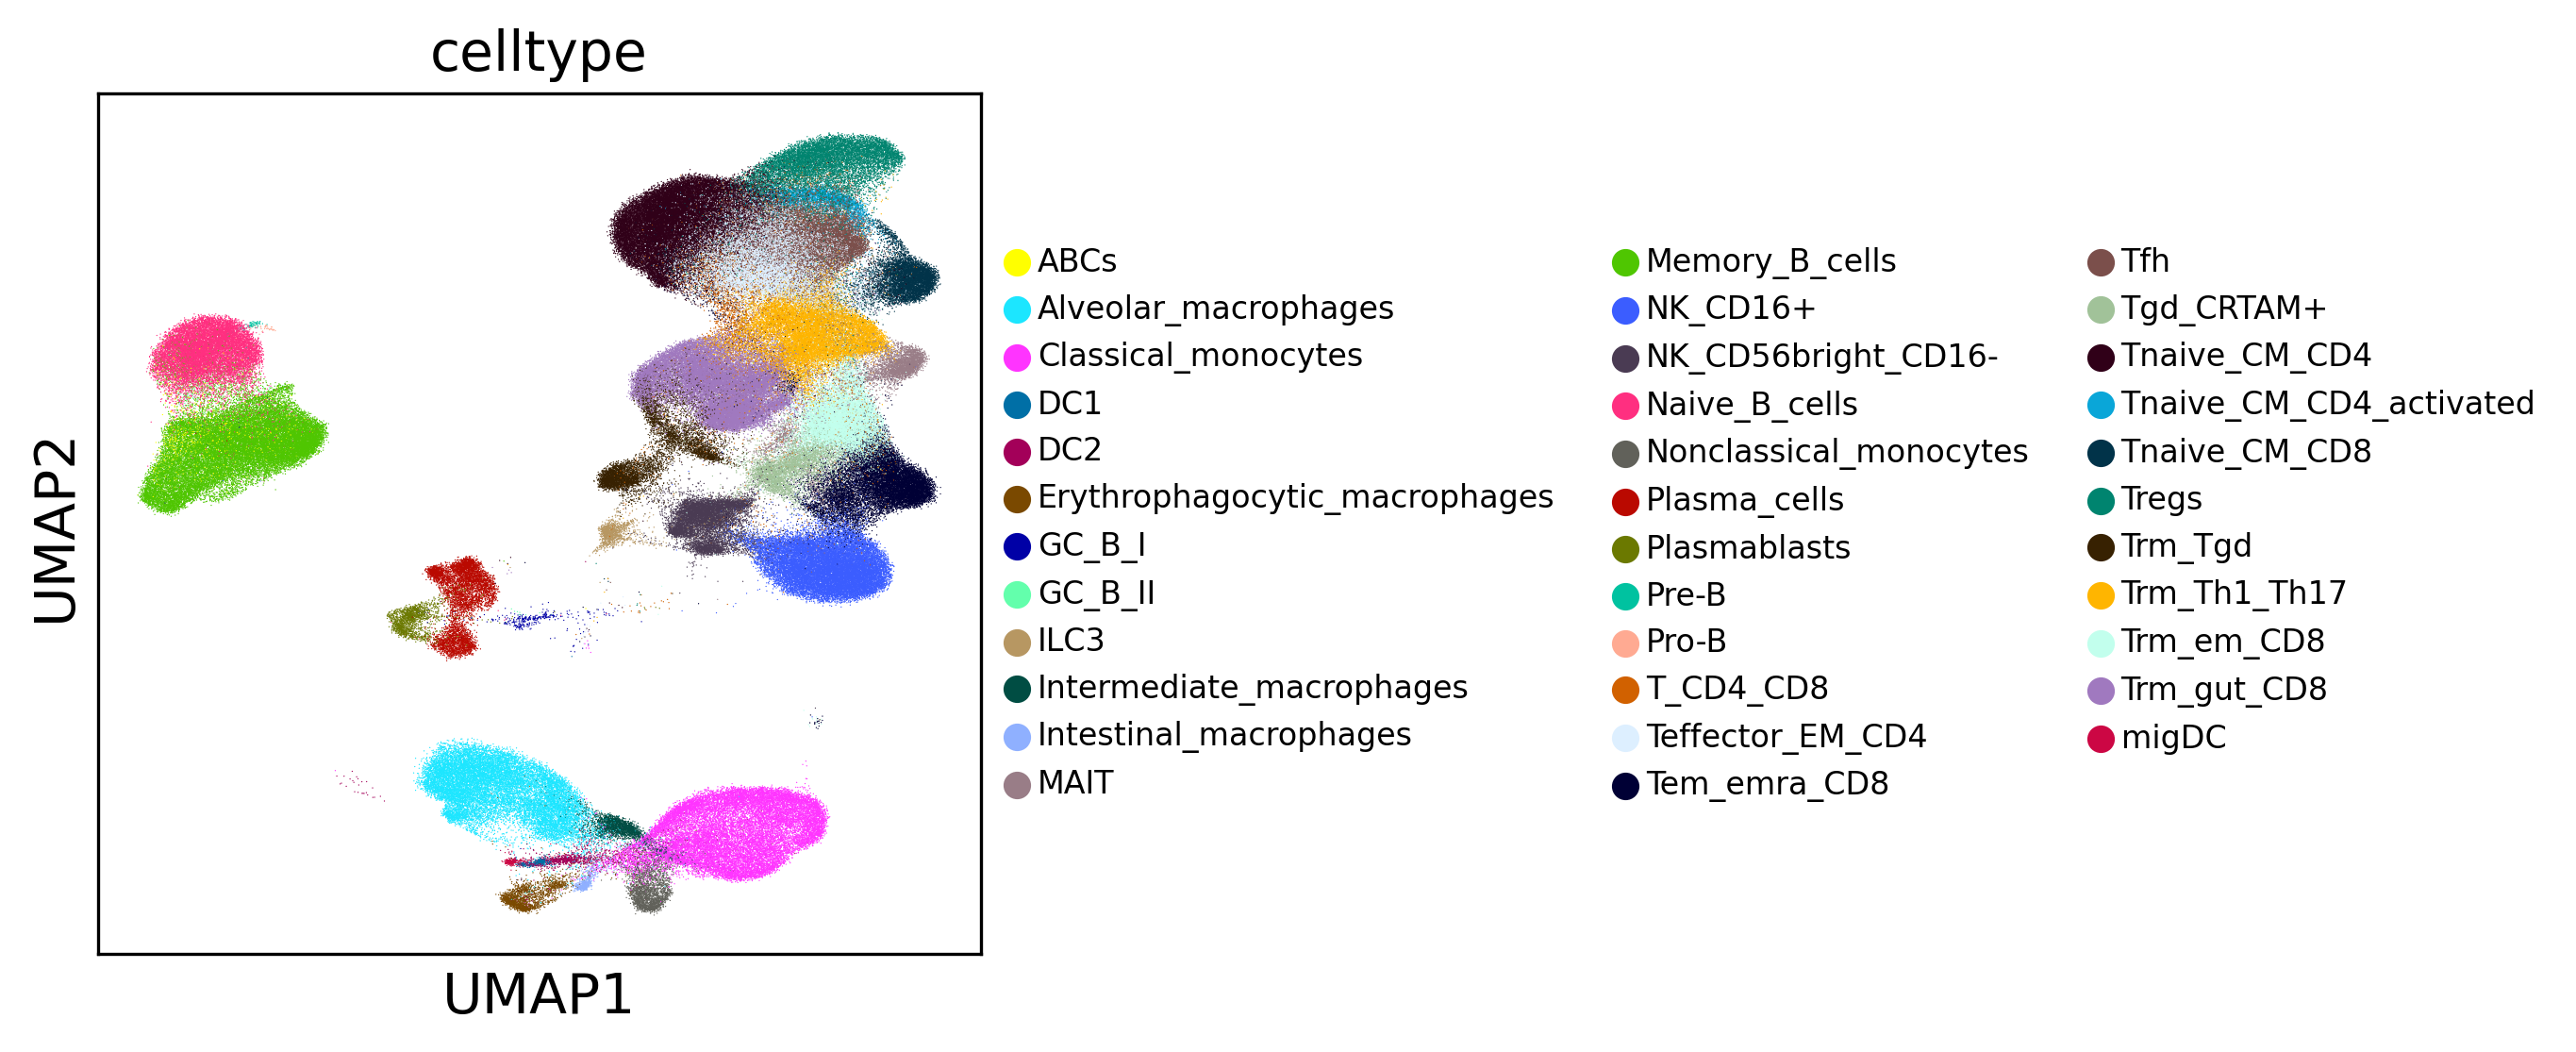

In [32]:
sc.pl.umap(adata_subset, color=["celltype"],#save= "Lymphoid.png",
           legend_fontoutline=1, legend_fontsize=8)

In [33]:
adata = adata_subset
del(adata_subset)

## Main compartment annotation

In [34]:
anno_lineage = {
    ## Bcells
    'ABCs': "Bcells",
    'GC_B (I)': "Bcells",
    'GC_B (II)': "Bcells",
    'Memory B cells': "Bcells",
    'Naive B cells': "Bcells",
    'Plasma cells': "Bcells",
    'Plasmablasts': "Bcells",
    'Pre-B': "Bcells",
    'Pro-B': "Bcells",
    ## Tcells
    'ILC3': "Tcells",
    'MAIT': "Tcells",
    'NK_CD16+': "Tcells",
    'NK_CD56bright_CD16-': "Tcells",
    'T_CD4/CD8': "Tcells",
    'Teffector/EM_CD4': "Tcells",
    'Tem/emra_CD8': "Tcells",
    'Tfh': "Tcells",
    'Tgd_CRTAM+': "Tcells",
    'Tnaive/CM_CD4': "Tcells",
    'Tnaive/CM_CD4_activated': "Tcells",
    'Tnaive/CM_CD8': "Tcells",
    'Tregs': "Tcells",
    'Trm/em_CD8': "Tcells",
    'Trm_Tgd': "Tcells",
    'Trm_Th1/Th17': "Tcells",
    'Trm_gut_CD8': "Tcells",
    ## Myeloid (NEED TO UPDATE!)
    'Alveolar macrophages' : 'Myeloid', 
    'Classical monocytes' : 'Myeloid',# 'Cycling',
    'DC1' : 'Myeloid',
    'DC2' : 'Myeloid',
    'Erythrophagocytic macrophages' : 'Myeloid',
    'Intermediate macrophages' : 'Myeloid',
    'Intestinal macrophages' : 'Myeloid',# 'MNP/T doublets',
    'Nonclassical monocytes' : 'Myeloid',
    'migDC' : 'Myeloid'
}

In [35]:
adata.obs['Lineage_anno'] = adata.obs['Manually_curated_celltype']
adata.obs['Lineage_anno'] = (
    adata.obs["Manually_curated_celltype"]
    .map(anno_lineage)
.astype('category')
)

/home/irepan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  """Entry point for launching an IPython kernel.


In [36]:
adata.obs["alpha"] = float('NaN')
for i in alpha_vals["cell"]:
    #print(i)
    adata.obs["alpha"][adata.obs["celltype"] == i] = float(alpha_vals["α"][alpha_vals["cell"] == i])

/home/irepan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


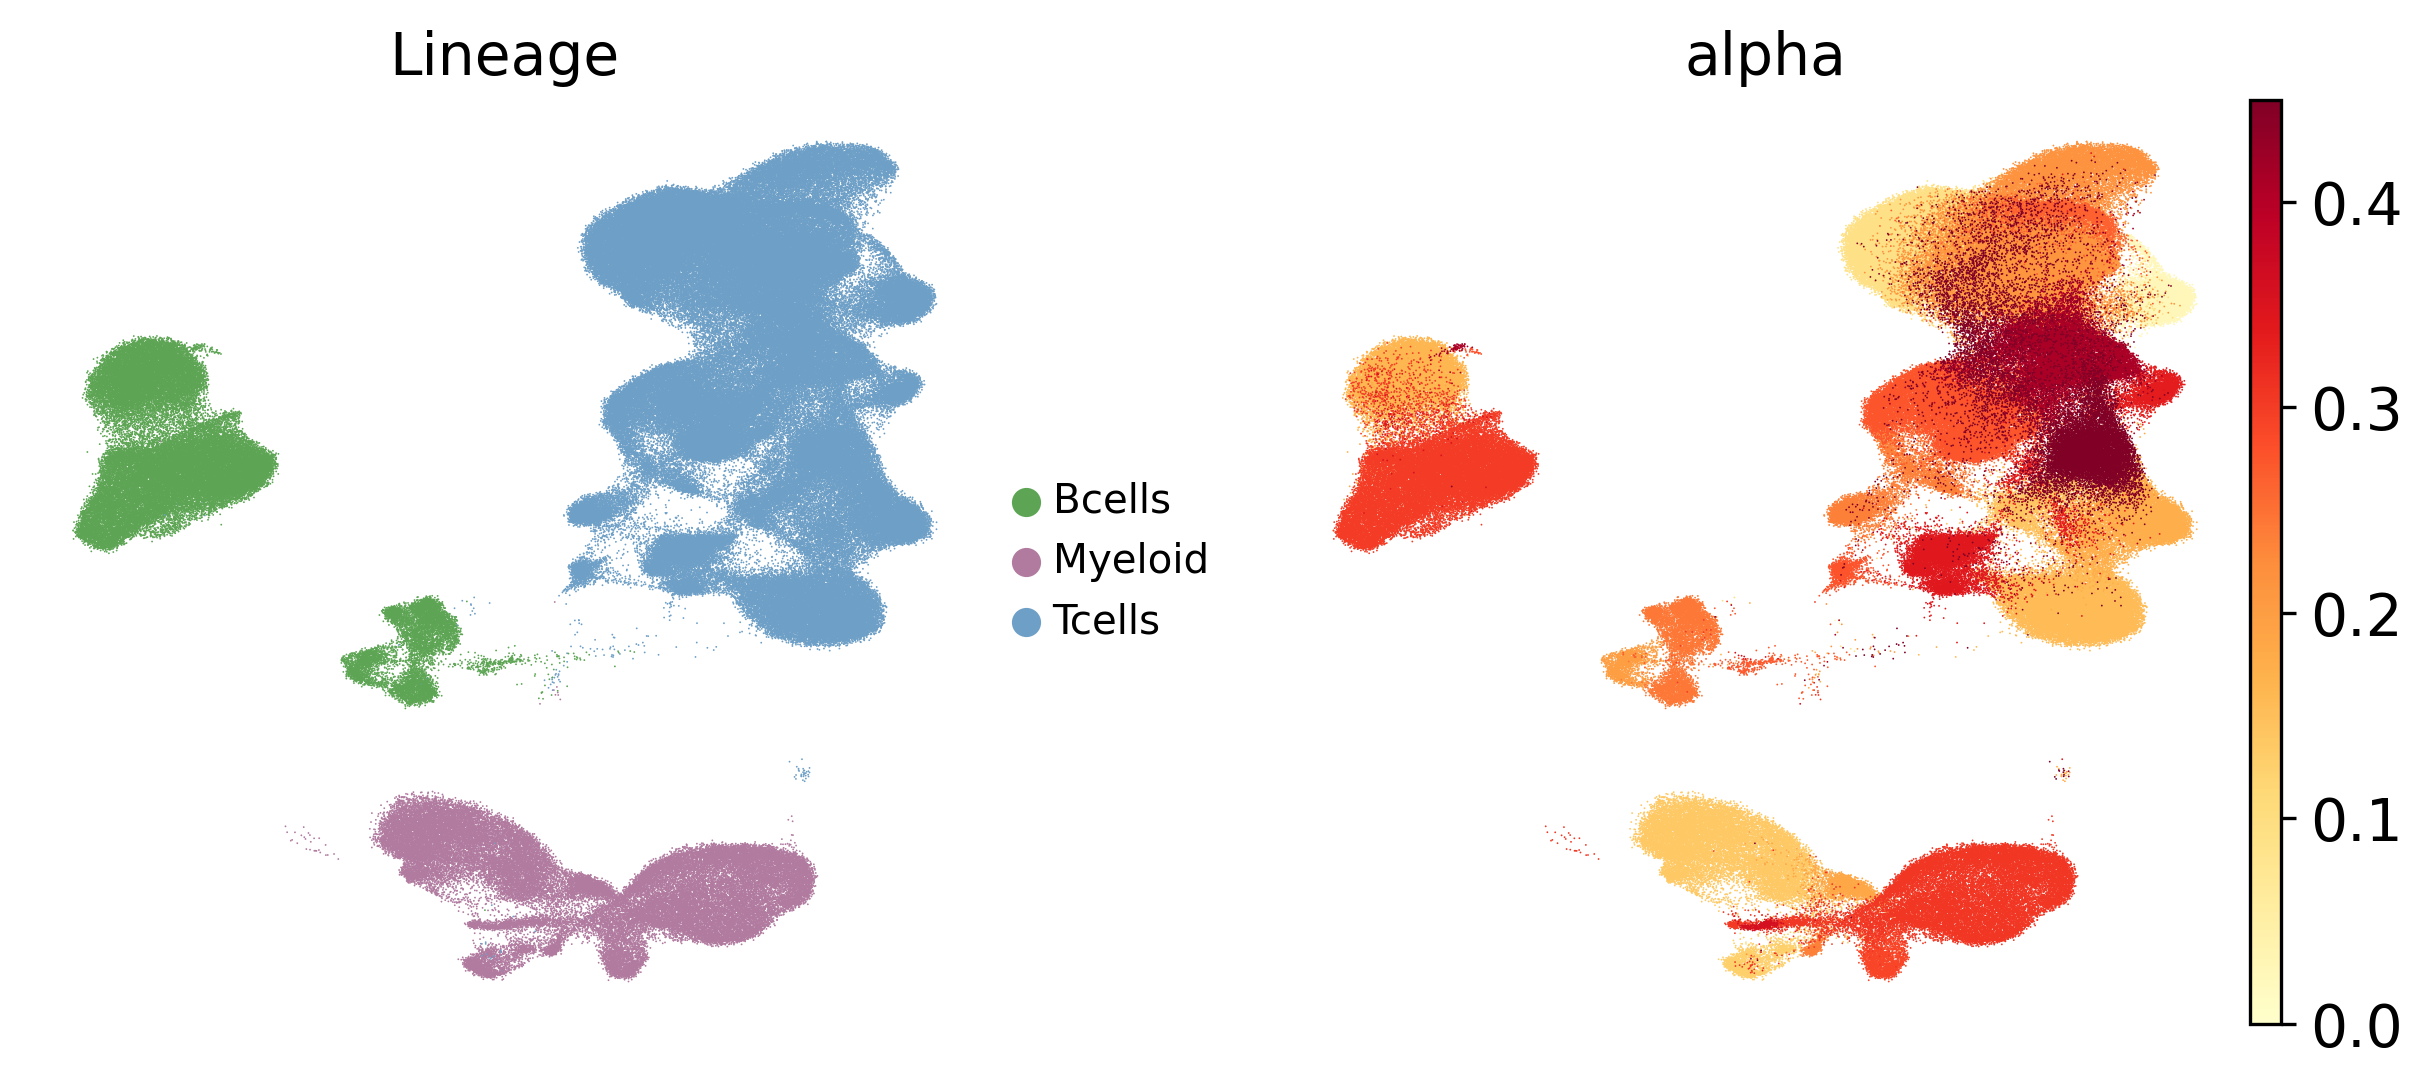

In [37]:
sc.pl.umap(adata, color=["Lineage_anno", "alpha"],save= "Adult_overview.svg",
           palette= {'Tcells' : "#6e9fc6","Bcells":"#5da554",  "Myeloid":"#b17ba0" },
           color_map=matplotlib.cm.YlOrRd, vmax = 0.45, vmin= 0,
           legend_loc = 'right margin',legend_fontoutline =1, 
           frameon= False, title= "Lineage", size = 0.75,
           legend_fontsize= 'x-small', na_in_legend = False )

## Run DE analysis between main compartments

In [38]:
adata.X.max()

8.856983

In [49]:
adata

AnnData object with n_obs × n_vars = 315481 × 36601
    obs: 'Organ', 'Donor', 'Chemistry', 'Cell_category', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Majority_voting_CellTypist_high', 'Manually_curated_celltype', 'Sex', 'Age_range', 'celltype', 'Lineage_anno', 'alpha'
    uns: 'Age_range_colors', 'Sex_colors', 'Manually_curated_celltype_colors', 'celltype_colors', 'Lineage_anno_colors'
    obsm: 'X_umap'
    layers: 'counts'

In [ ]:
adata = adata.raw.to_adata()

In [ ]:
adata.X.max()

In [58]:
adata.X = adata.layers["counts"]

In [59]:
adata.X.max()

66149.0

In [60]:
del adata.layers["counts"]

In [61]:
adata

AnnData object with n_obs × n_vars = 315481 × 36601
    obs: 'Organ', 'Donor', 'Chemistry', 'Cell_category', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Majority_voting_CellTypist_high', 'Manually_curated_celltype', 'Sex', 'Age_range', 'celltype', 'Lineage_anno', 'alpha'
    uns: 'Age_range_colors', 'Sex_colors', 'Manually_curated_celltype_colors', 'celltype_colors', 'Lineage_anno_colors'
    obsm: 'X_umap'

<AxesSubplot:title={'center':'adata'}>

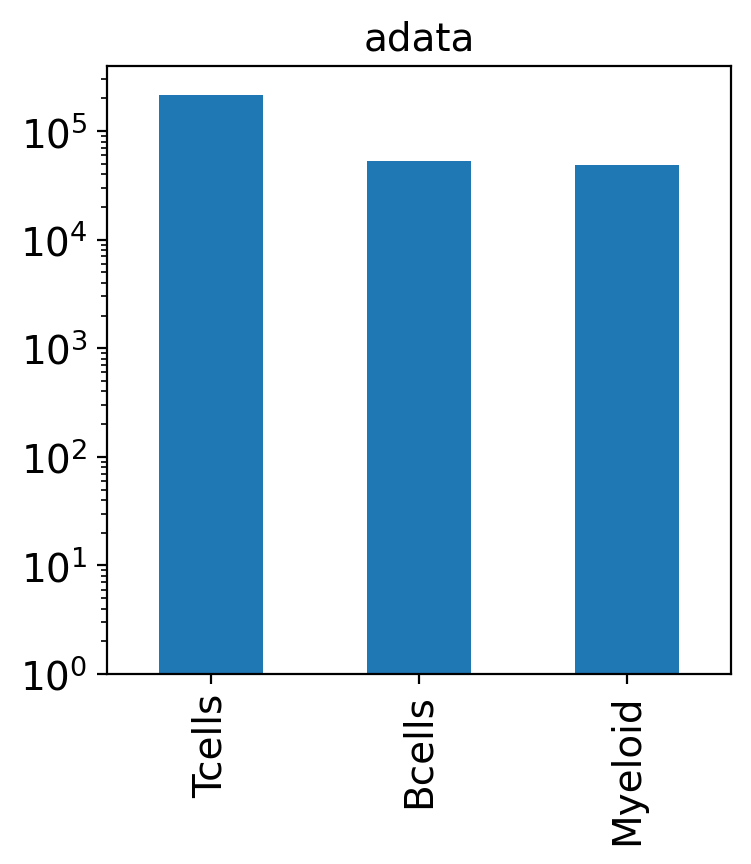

In [69]:
adata.obs['Lineage_anno'].value_counts().plot(kind='bar', log="y",
                                              grid=False, title='adata')

In [65]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=10e4)
sc.pp.log1p(adata)

In [66]:
sc.settings.verbosity = 4
sc.pp.highly_variable_genes(adata, min_mean=0.3, max_mean=5)

extracting highly variable genes
    Gene indices [20003] fell into a single bin: their normalized dispersion was set to 1.
    Decreasing `n_bins` will likely avoid this effect.
    finished (0:00:11)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


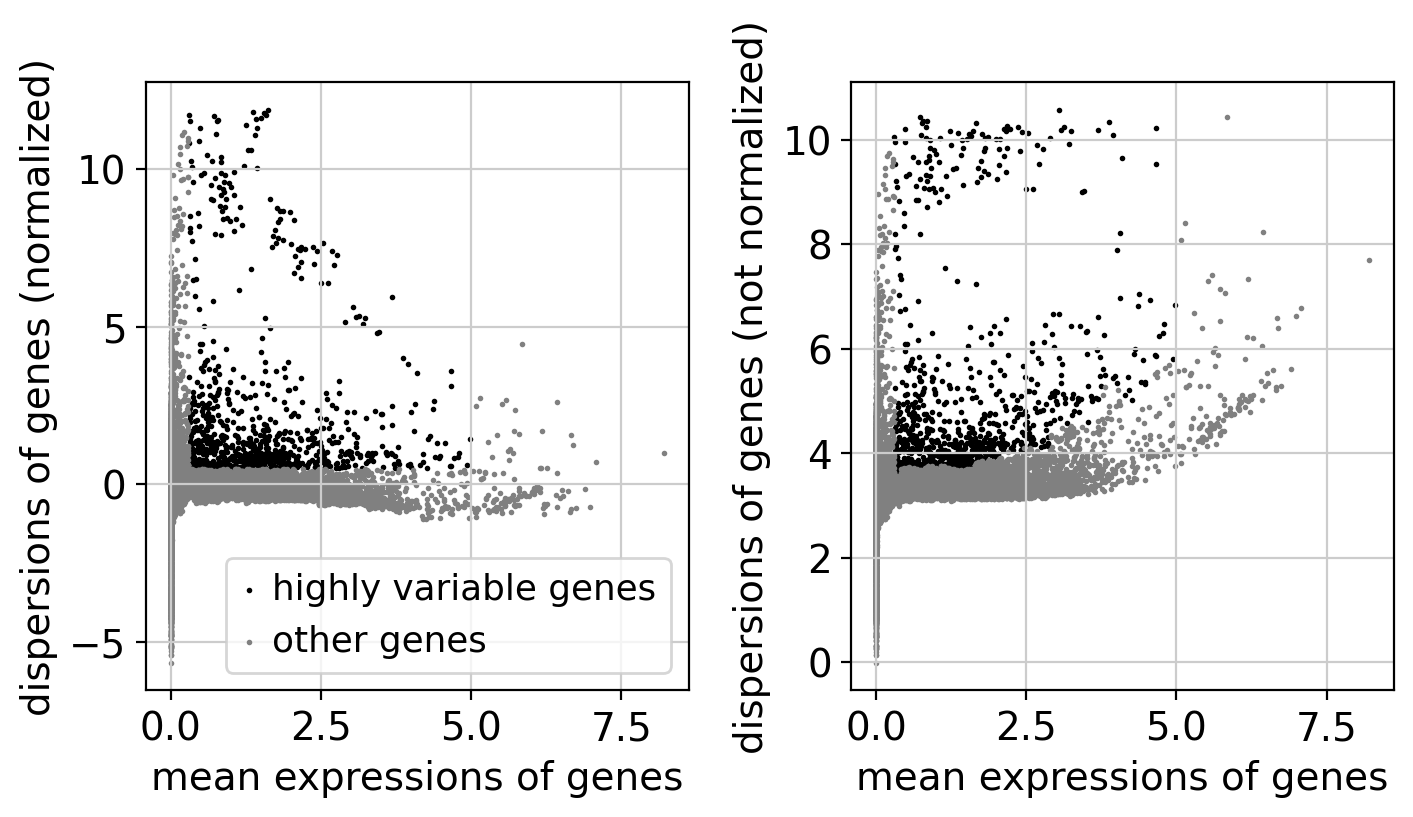

In [67]:
sc.pl.highly_variable_genes(adata)

normalizing counts per cell
    finished (0:00:07)


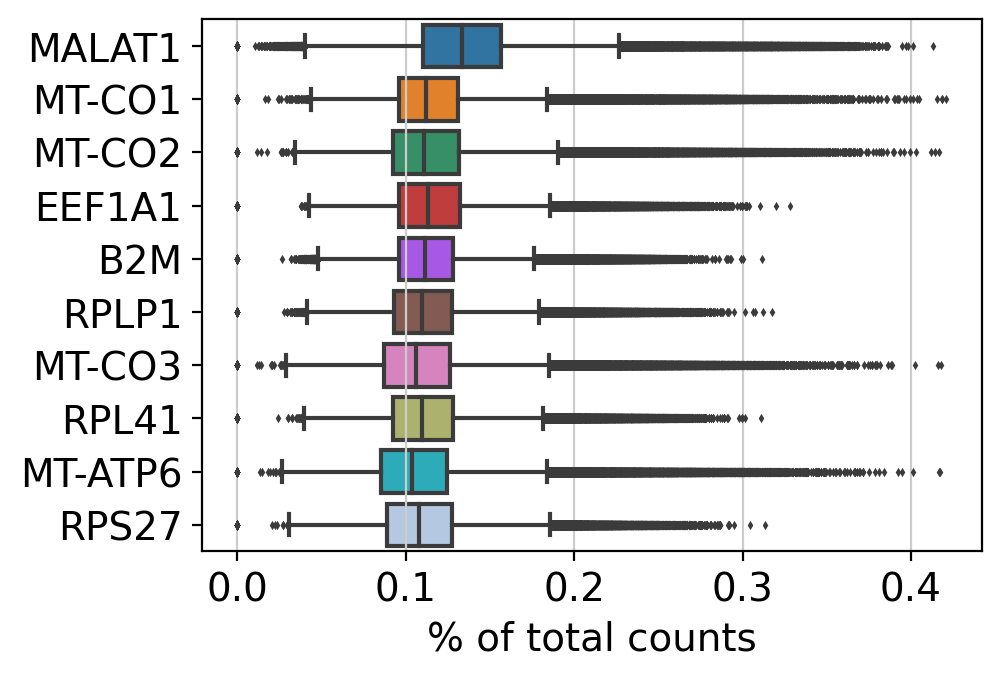

In [68]:
sc.pl.highest_expr_genes(adata, n_top=10, show=True)

ranking genes
    consider 'Lineage_anno' groups:
    with sizes: [ 52788  48208 214485]
    finished: added to `.uns['wilcoxon']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:21:05)


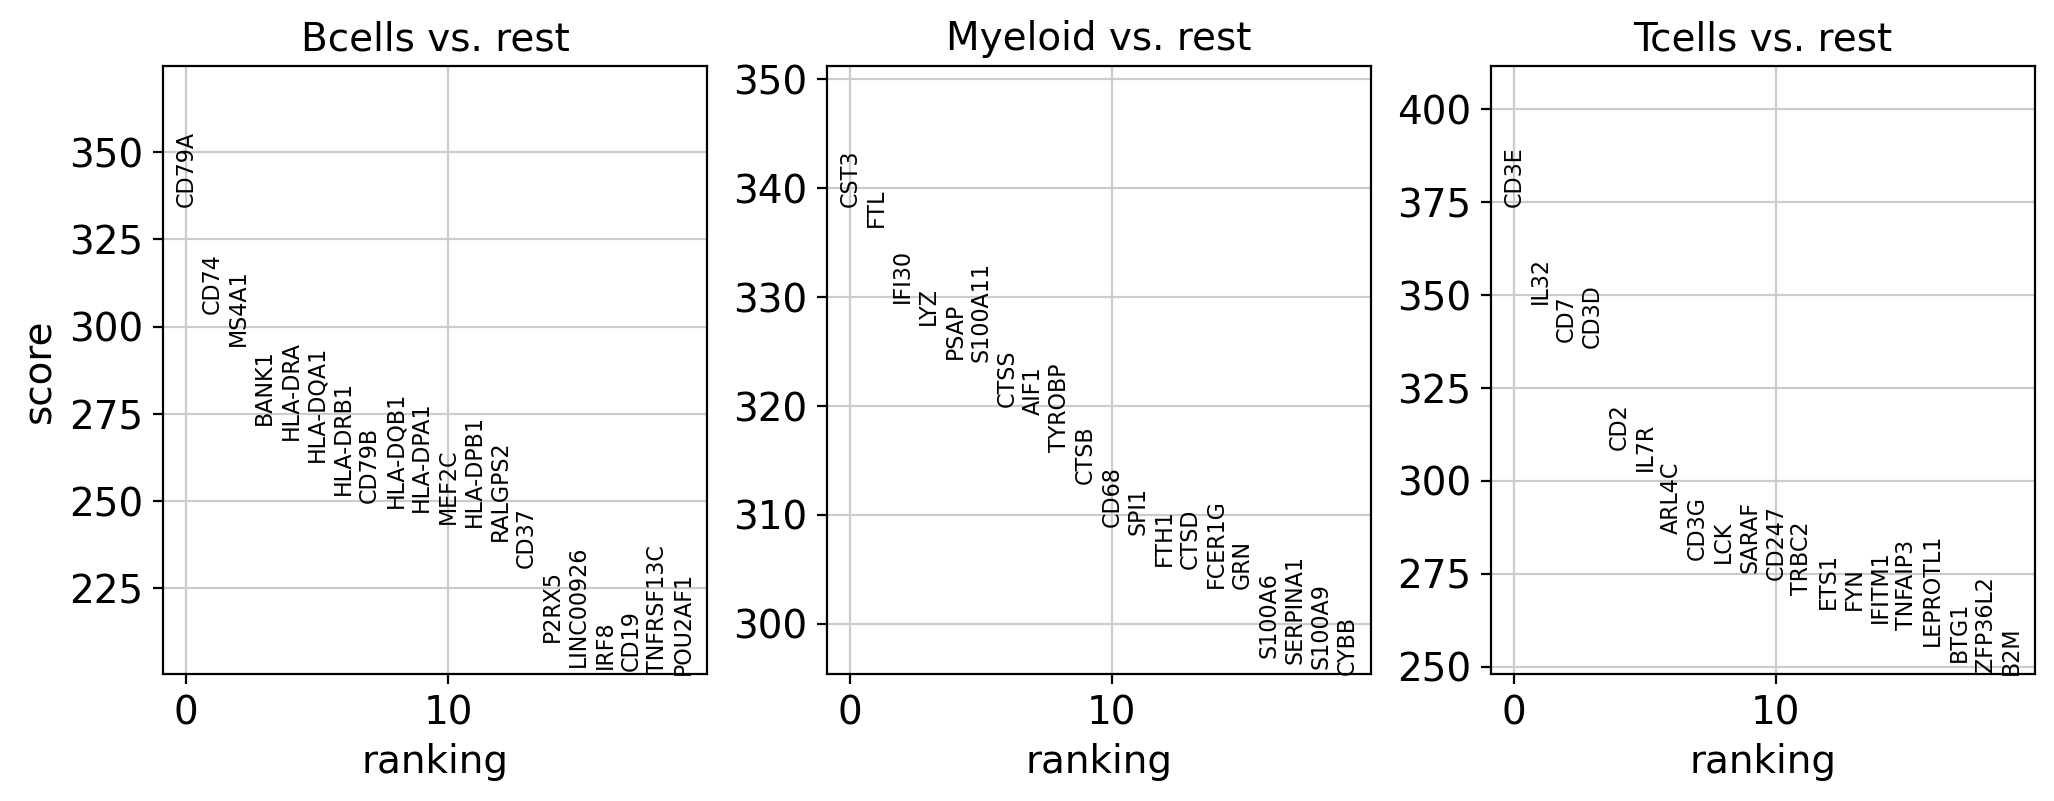

In [70]:
sc.tl.rank_genes_groups(adata, groupby= 'Lineage_anno', method='wilcoxon', key_added= "wilcoxon")
sc.pl.rank_genes_groups(adata,  n_genes=20,  sharey=False, key= "wilcoxon")

In [71]:
Subtypes = adata.obs['Lineage_anno'].unique()
Markers = [[]]*len(Subtypes)

for i in range(0,len(Subtypes)):
    print(i, Subtypes[i])
    m = sc.get.rank_genes_groups_df(adata, group=Subtypes[i],
                                    key='wilcoxon', pval_cutoff=0.0001,
                                    log2fc_min=1)
    m = m.sort_values("logfoldchanges", ascending=False)
    m.reset_index(drop=True, inplace=True)
    Markers[i] = m

0 Tcells
1 Myeloid
2 Bcells


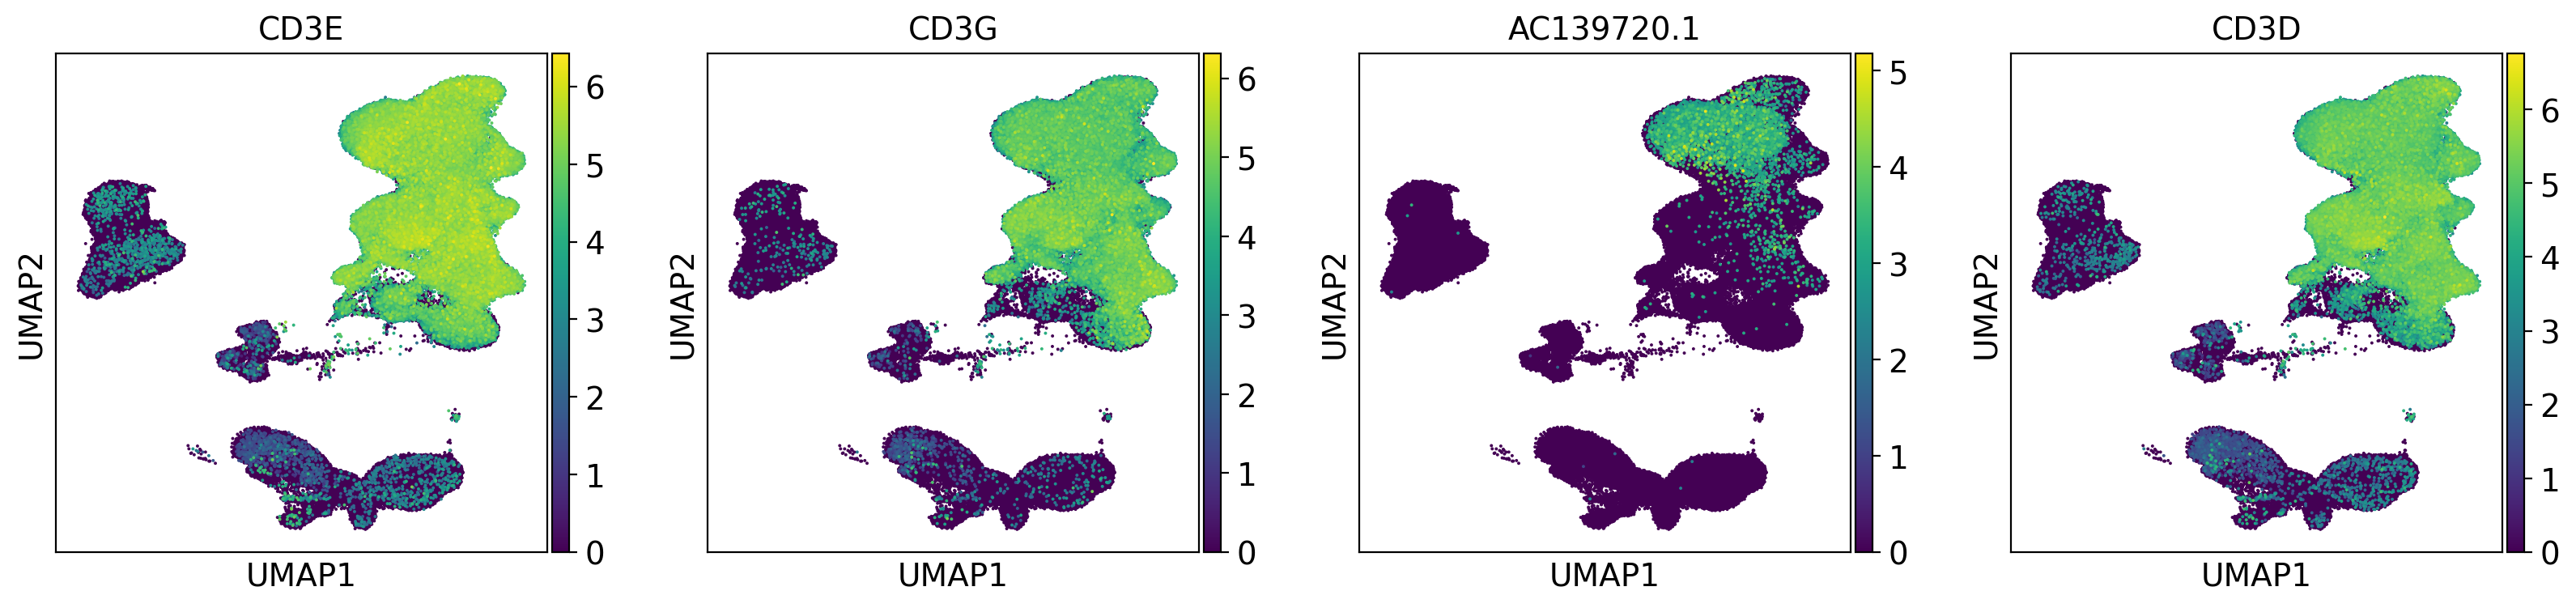

In [72]:
sc.pl.umap(adata, color= Markers[0]["names"][0:4], size=8 ) # top

In [73]:
#pip install upsetplot
from upsetplot import from_contents
from upsetplot import UpSet

In [74]:
CompleteDict_markers =  {}

for i in range(0,len(Subtypes)):
    CompleteDict_markers[Subtypes[i]] = Markers[i]['names']


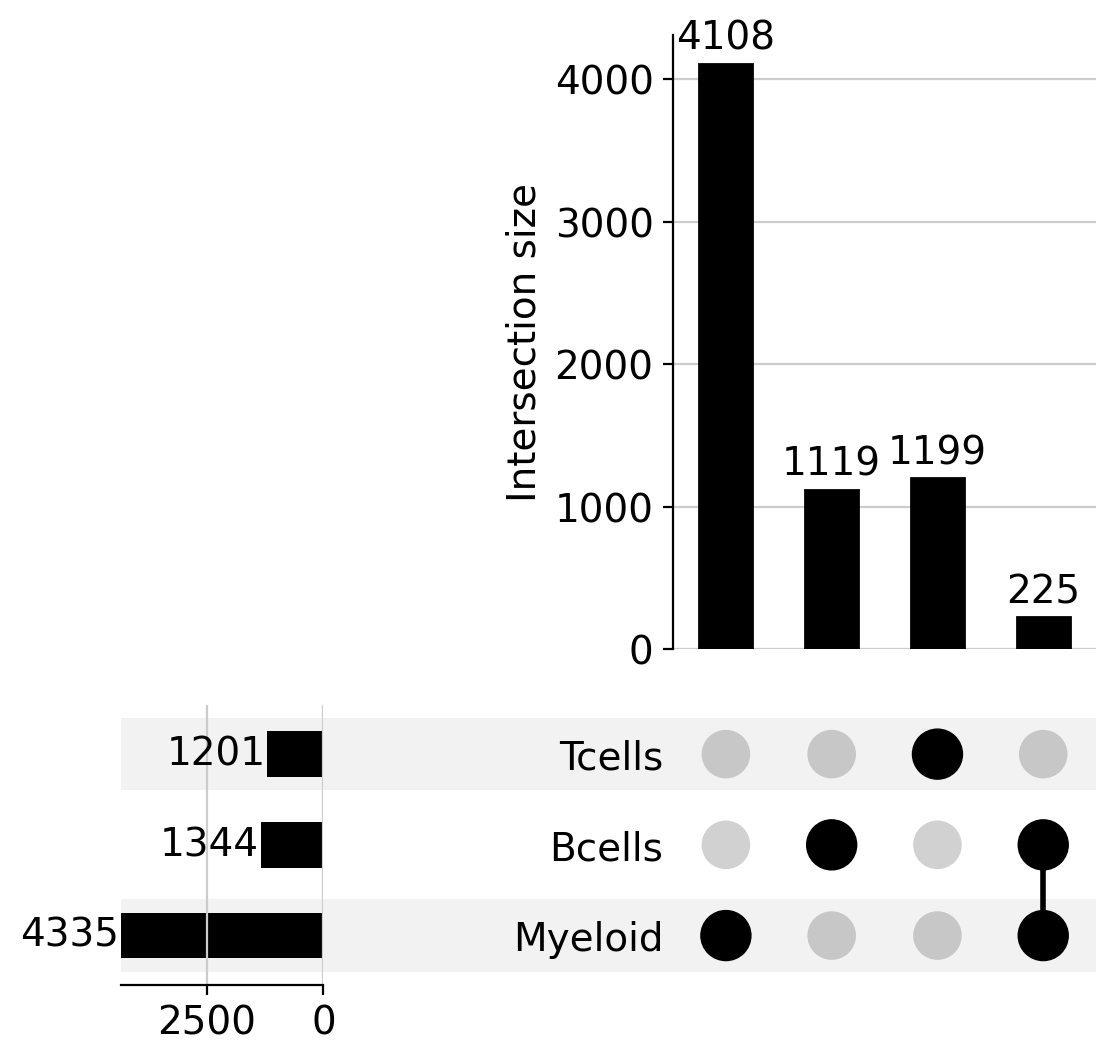

In [75]:
plt = UpSet(from_contents(CompleteDict_markers),
            min_subset_size=50, subset_size='count',
            element_size=50,  show_counts=True).plot()

In [76]:
full_csv_path = '/home/irepan/Desktop/Github/Immune_Adaptation_Atlas_2023/Adult/ENS_FULL_genelists_wilcox/Compartments/full.csv'

(pd.DataFrame.from_dict(data=CompleteDict_markers, orient='index')
   .to_csv(full_csv_path, header=False))

In [77]:
%load_ext rpy2.ipython

In [78]:
%%R -i full_csv_path
library("EnsDb.Hsapiens.v86")
library(stringr)

path <- "~/Desktop/Github/Immune_Adaptation_Atlas_2023/Adult/ENS_FULL_genelists_wilcox/Compartments/"

mycsv <- read.csv(full_csv_path, row.names = 1,header = F, na.strings = "")

for (i in 1:nrow(mycsv))
{
    genelist <- row.names(mycsv)[i]
    n <- sum(!is.na(mycsv[i,]))
    #print(paste0(n," genes"))
    
    goi <- as.character(mycsv[i,1:n])
    print(goi[1:5])

    f <- str_remove_all(genelist, "[()]")
    print(f)
    ens_df <- ensembldb::select(EnsDb.Hsapiens.v86, keys= goi, 
                              keytype = "SYMBOL", 
                              columns = c("SYMBOL","GENEID"))
   
    ens_df <- ens_df$GENEID[grepl(pattern = "^ENS", x = ens_df$GENEID)]
    #print(head(ens_df)) 

    write(x = ens_df, file = paste0(path, f ,"_FULL_ENSEMBL.txt"),ncolumns = 1)

}


R[write to console]: Loading required package: ensembldb

R[write to console]: Loading required package: BiocGenerics

R[write to console]: 
Attaching package: ‘BiocGenerics’


R[write to console]: The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


R[write to console]: The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


R[write to console]: Loading required package: GenomicRanges

R[write to console]: Loading required package: stats4

R[write to console]: Loading required package: S4Vectors

R[write to console]: 
Attaching package: ‘S4Vectors’


R[write to cons

[1] "CD3E"       "CD3G"       "AC139720.1" "CD3D"       "TRAV8-3"   
[1] "Tcells"
[1] "AP000915.2" "LINC02024"  "LYZ"        "FPR1"       "CSTA"      
[1] "Myeloid"
[1] "CD79A"      "VPREB3"     "CD19"       "FCRLA"      "AC021678.2"
[1] "Bcells"
